In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
train = pd.read_csv('input/train.csv')
train['fn'] = train.index
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,fn
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [4]:
class PixelImageList(ImageList):
    def open(self,fn):
        regex = re.compile(r'\d+')
        fn = re.findall(regex,fn)
        df = self.inner_df[self.inner_df.fn.values == int(fn[0])]
        df_fn = df[df.fn.values == int(fn[0])]
        img_pixel = df_fn.drop(labels=['label','fn'],axis=1).values
        img_pixel = img_pixel.reshape(28,28)
        img_pixel = np.stack((img_pixel,)*3,axis=-1)
        return Image(pil2tensor(img_pixel,np.float32).div_(255))

In [5]:
src = (PixelImageList.from_df(train,'.',cols='fn')
      .split_by_rand_pct()
      .label_from_df(cols='label'))

In [6]:
data = (src.transform(tfms=(rand_pad(padding=5,size=28,mode='zeros'),[]))
       .databunch(num_workers=0,bs=128)  # num_workers is 0 cuz of Pytorch multi-process problem on windows
       .normalize(imagenet_stats))

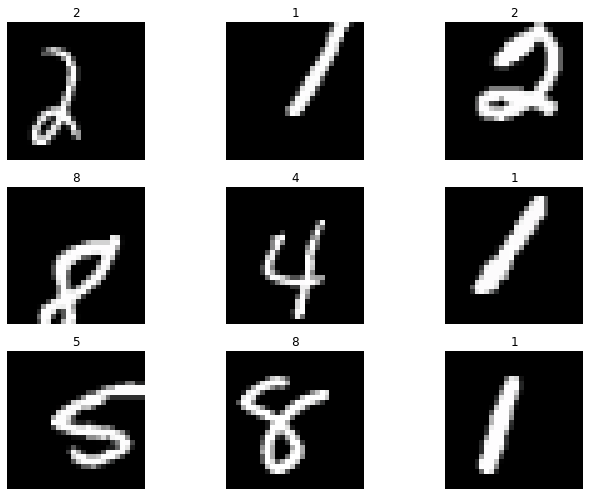

In [7]:
data.show_batch(rows=3,figsize=(10,7))

In [8]:
print(data.train_ds[0][1]) #label
data.train_ds[0][0] #img

1


In [9]:
data.train_ds[0][0].data,data.train_ds[0][0].data.shape,data.train_ds[0][0].data.max()

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 torch.Size([3, 28, 28]),
 tensor(1.))

In [10]:
learn = cnn_learner(data,models.resnet50,metrics=accuracy)

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


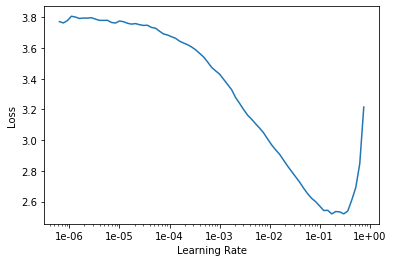

In [13]:
learn.recorder.plot()

In [19]:
lr = 1e-2

In [20]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.180994,0.122710,0.967500,01:54
1,0.139160,0.075444,0.980357,01:53
2,0.100519,0.090636,0.978691,01:54
3,0.054069,0.031640,0.992143,01:54
4,0.030279,0.025595,0.993214,01:54


In [21]:
learn.unfreeze()

In [26]:
learn.lr_find(start_lr=1e-09,end_lr=1)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


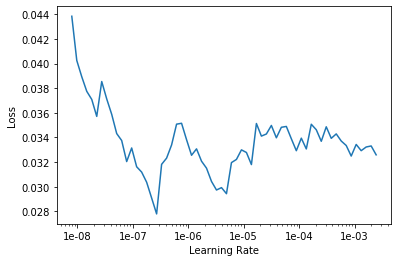

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(8,slice(5e-08,1e-07))

epoch,train_loss,valid_loss,accuracy,time
0,0.023503,0.032844,0.992500,01:54
1,0.022423,0.031545,0.992738,01:54
2,0.030292,0.029664,0.992976,01:55
3,0.022253,0.031346,0.992857,01:54
4,0.022775,0.029430,0.993214,01:54
5,0.019464,0.030088,0.992738,01:55
6,0.019623,0.028927,0.993452,01:57
7,0.024140,0.031064,0.992857,01:54


In [29]:
df_test = pd.read_csv('../input/test.csv')
df_test['label'] = 0
df_test['fn'] = df_test.index
df_test.head()

FileNotFoundError: [Errno 2] File b'../input/test.csv' does not exist: b'../input/test.csv'